In [1]:
from cobaya.yaml import yaml_load_file
import getdist.plots as gdplt
import getdist
import os, fnmatch
from cobaya import load_samples
import numpy as np
%matplotlib inline 

In [4]:
grid_root_dir = '/home/fverdian/cobaya/chains-ulysses/axigrid_cmb_only'

Samples={}

for root, dirs, files in os.walk(grid_root_dir):
    for chain_name in sorted(fnmatch.filter(dirs, 'base_*')):
        if chain_name in ['base_m29','base_m30']: continue
        print(chain_name)
        subdirs = next(os.walk(os.path.join(root, chain_name)))[1]
        only_subdir = subdirs[0]
        subdir_path = os.path.join(root, chain_name, only_subdir)
        Samples[chain_name] = load_samples(subdir_path+'/'+chain_name+'_'+only_subdir, to_getdist=True)
        Samples[chain_name].label = chain_name
        Samples[chain_name].ma_val = -int(chain_name[-2:])

chains_to_plot=list(Samples.values())

base_m24
base_m25
base_m26
base_m27
base_m28


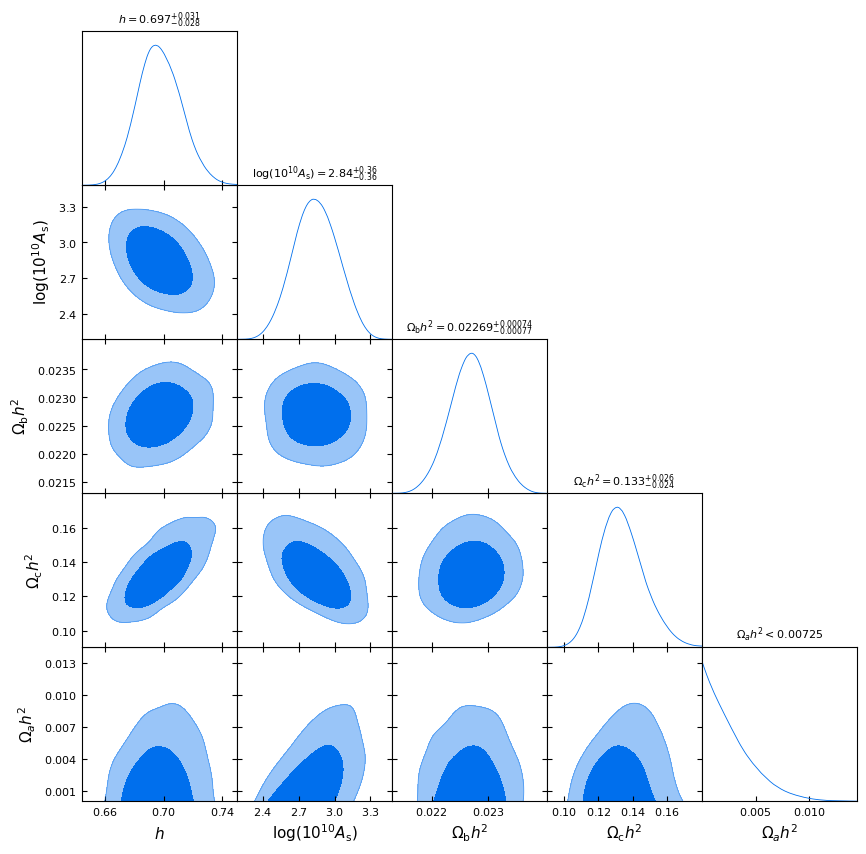

In [69]:

pars_toplot =['h', 'logA', 'omega_b','omega_cdm','omega_scf']

gdplot = gdplt.get_subplot_plotter()

gdplot.triangle_plot(chains_to_plot[-1] ,  pars_toplot, title_limit=2, filled=True)
# gdplot.finish_plot(no_tight=True)

In [5]:
for samp in chains_to_plot:
    print(samp.label[5:],'-->', samp.getInlineLatex('omega_scf',limit=2))


m24 --> \Omega_{a} h^2 < 0.107
m25 --> \Omega_{a} h^2 < 0.0719
m26 --> \Omega_{a} h^2 < 0.00613
m27 --> \Omega_{a} h^2 < 0.00304
m28 --> \Omega_{a} h^2 < 0.00194


None


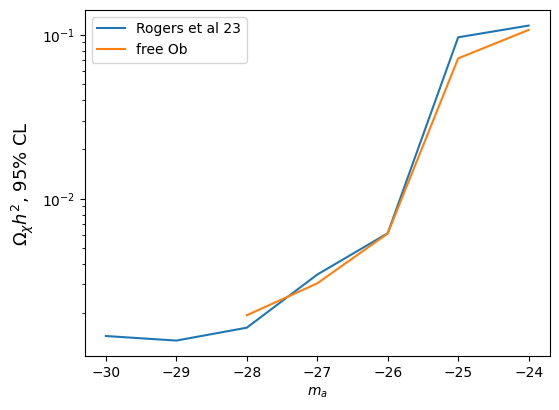

In [7]:
import matplotlib.pyplot as plt
print(chains_to_plot[0].getUpper('omega_chi'))
mvals = [-24, -25, -26, -27, -28,-29, -30]
RogersBOSS = [0.155,0.04174,0.01717,0.00542,0.00842,0.02259,0.02771]
RogersPlanck = [0.11399,0.09667,0.00615,0.00344,0.00163,0.00136,0.00145]
plt.figure(figsize=(6,4.5))
plt.plot(mvals, RogersPlanck, label='Rogers et al 23')
# plt.fill_between(mvals, Rogers, y2=0.1, interpolate=True, color='b', alpha=0.1)

# My bounds
my2lims = [samp.getMargeStats().parWithName('omega_scf').limits[1].upper for samp in chains_to_plot]
mvals2 = [samp.ma_val for samp in chains_to_plot] 

plt.plot(mvals2, my2lims, label='free Ob')

# plt.plot(mvals2, np.array(my2lims)+0.00064, label='my test')

# plt.fill_between([-24, -26, -27, -28, -25, -30] , [0.051074421,0.0094773271, 0.0055081018, 0.00671363, 0.015642255, 0.013391776], y2=0.1, interpolate=True, color='darkorange', alpha=0.1)

# plt.ylim([0.,0.1])
plt.yscale('log')
plt.xlabel(r'$m_a$')
plt.ylabel(r'$\Omega_\chi h^2$, 95% CL', fontsize=13)
plt.legend()
plt.show()

In [56]:
from tabulate import tabulate
table = tabulate(list(zip(mvals,RogersPlanck, my2lims+[None,None,None])), headers=[r'$m_a$',r'Rogers Planck $\Omega_a h^2$ 95%CL',r'noi Planck'], floatfmt='.3g',tablefmt="latex_raw", rowalign='center')
print(table)

\begin{tabular}{rrr}
\hline
   $m_a$ &   Rogers Planck $\Omega_a h^2$ 95%CL &   noi Planck \\
\hline
     -24 &                              0.114   &      0.107   \\
     -25 &                              0.0967  &      0.0719  \\
     -26 &                              0.00615 &      0.00613 \\
     -27 &                              0.00344 &      0.00304 \\
     -28 &                              0.00163 &              \\
     -29 &                              0.00136 &              \\
     -30 &                              0.00145 &              \\
\hline
\end{tabular}
